# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Analysis/Modeling

В РЕЗУЛЬТАТЕ РАБОТЫ НАД ДАННЫМ ПРОЕКТОМ ВЫ:

- ✔️ создадите свою первую модель, основанную на алгоритмах машинного обучения;
- ✔️ примете участие в соревновании на Kaggle;
- ✔️ поймёте, как правильно «подготовить» данные, чтобы ваша модель работала лучше.

Скоро вы убедитесь не только в теории, но и на практике, что тщательная очистка данных, проектирование признаков и разведывательный анализ данных способны повысить точность модели в два и более раз, и владение этими навыками играет в машинном обучении не меньшую роль, чем умение выбрать алгоритм и настроить модель.

КАКОЙ КЕЙС РЕШАЕМ?

Представьте, что вы работаете дата-сайентистом в компании Booking. Одна из проблем компании — это нечестные отели, которые накручивают себе рейтинг. Одним из способов обнаружения таких отелей является построение модели, которая предсказывает рейтинг отеля. Если предсказания модели сильно отличаются от фактического результата, то, возможно, отель ведёт себя нечестно, и его стоит проверить.

Вам поставлена задача создать такую модель. 

# Разбираемся с данными

В этом модуле вы будете работать с датасетом, в котором содержатся сведения о 515 000 отзывов на отели Европы. Модель, которую вы будете обучать, должна предсказывать рейтинг отеля по данным сайта Booking на основе имеющихся в датасете данных. Изученные нами навыки разведывательного анализа помогут улучшить модель. 

Первоначальная версия датасета содержит 17 полей со следующей информацией:

- hotel_address — адрес отеля;
- review_date — дата, когда рецензент разместил соответствующий отзыв;
- average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год;
- hotel_name — название отеля;
- reviewer_nationality — страна рецензента;
- negative_review — отрицательный отзыв, который рецензент дал отелю;
- review_total_negative_word_counts — общее количество слов в отрицательном отзыв;
- positive_review — положительный отзыв, который рецензент дал отелю;
- review_total_positive_word_counts — общее количество слов в положительном отзыве.
- reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта;
- total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом;
- total_number_of_reviews — общее количество действительных отзывов об отеле;
- tags — теги, которые рецензент дал отелю;
- days_since_review — количество дней между датой проверки и датой очистки;
- additional_number_of_scoring — есть также некоторые гости, которые просто поставили оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки.
- lat — географическая широта отеля;
- lng — географическая долгота отеля.

Ответы на вопросы ниже помогут вам лучше сориентироваться в файле, а также покажут некоторые важные особенности, которые необходимо будет учесть при создании модели.

In [3]:
hotels = pd.read_csv('data/hotels.csv')
hotels.head()

,hotel_address,additional_number_of_scoring,review_date,average_score,hotel_name,reviewer_nationality,negative_review,review_total_negative_word_counts,total_number_of_reviews,positive_review,review_total_positive_word_counts,total_number_of_reviews_reviewer_has_given,reviewer_score,tags,days_since_review,lat,lng
0,Stratton Street Mayfair Westminster Borough Lo...,581,2/19/2016,8.4,The May Fair Hotel,United Kingdom,Leaving,3,1994,Staff were amazing,4,7,10.0,"[' Leisure trip ', ' Couple ', ' Studio Suite ...",531 day,51.507894,-0.143671
1,130 134 Southampton Row Camden London WC1B 5AF...,299,1/12/2017,8.3,Mercure London Bloomsbury Hotel,United Kingdom,poor breakfast,3,1361,location,2,14,6.3,"[' Business trip ', ' Couple ', ' Standard Dou...",203 day,51.521009,-0.123097
2,151 bis Rue de Rennes 6th arr 75006 Paris France,32,10/18/2016,8.9,Legend Saint Germain by Elegancia,China,No kettle in room,6,406,No Positive,0,14,7.5,"[' Leisure trip ', ' Solo traveler ', ' Modern...",289 day,48.845377,2.325643
3,216 Avenue Jean Jaures 19th arr 75019 Paris Fr...,34,9/22/2015,7.5,Mercure Paris 19 Philharmonie La Villette,United Kingdom,No Negative,0,607,Friendly staff quiet comfortable room spotles...,11,8,10.0,"[' Leisure trip ', ' Solo traveler ', ' Standa...",681 day,48.888697,2.394540
4,Molenwerf 1 1014 AG Amsterdam Netherlands,914,3/5/2016,8.5,Golden Tulip Amsterdam West,Poland,Torn sheets,4,7586,The staff was very friendly and helpful Break...,20,10,9.6,"[' Business trip ', ' Couple ', ' Standard Dou...",516 day,52.385601,4.847060


In [2]:
# В каких столбцах данные содержат пропущенные значения?
hotels.isnull().sum()

NameError: name 'hotels' is not defined

In [4]:
# В каких столбцах данные хранятся в числовом формате?
hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386803 entries, 0 to 386802
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   hotel_address                               386803 non-null  object 
 1   additional_number_of_scoring                386803 non-null  int64  
 2   review_date                                 386803 non-null  object 
 3   average_score                               386803 non-null  float64
 4   hotel_name                                  386803 non-null  object 
 5   reviewer_nationality                        386803 non-null  object 
 6   negative_review                             386803 non-null  object 
 7   review_total_negative_word_counts           386803 non-null  int64  
 8   total_number_of_reviews                     386803 non-null  int64  
 9   positive_review                             386803 non-null  object 
 

In [5]:
# В каких столбцах данные представляют собой строки?
for i in hotels.columns:
    print(i, type(hotels[i][0]))

hotel_address <class 'str'>
additional_number_of_scoring <class 'numpy.int64'>
review_date <class 'str'>
average_score <class 'numpy.float64'>
hotel_name <class 'str'>
reviewer_nationality <class 'str'>
negative_review <class 'str'>
review_total_negative_word_counts <class 'numpy.int64'>
total_number_of_reviews <class 'numpy.int64'>
positive_review <class 'str'>
review_total_positive_word_counts <class 'numpy.int64'>
total_number_of_reviews_reviewer_has_given <class 'numpy.int64'>
reviewer_score <class 'numpy.float64'>
tags <class 'str'>
days_since_review <class 'str'>
lat <class 'numpy.float64'>
lng <class 'numpy.float64'>


In [6]:
# Напишите признак, представляющий собой дату.
hotels['review_date']

0          2/19/2016
1          1/12/2017
2         10/18/2016
3          9/22/2015
4           3/5/2016
             ...    
386798     4/19/2017
386799     2/13/2017
386800      2/7/2016
386801     5/21/2017
386802      8/5/2016
Name: review_date, Length: 386803, dtype: object

# Машинное обучение для самых маленьких

Что нужно сделать в этом юните?

Создать свою первую модель, основанную на алгоритмах машинного обучения.

Код для создания модели мы предоставим, но чтобы модель заработала, в неё нужно передать правильные данные. __Приведение данных в нужный вид и будет вашей задачей в этом юните.__

Однако прежде мы рассмотрим основные шаги, которые нужно проделать с данными от загрузки до получения результатов модели.

Мы подготовили для вас ноутбук с кодом для обучения модели. Далее мы шаг за шагом разберём все описанные в нём действия.

1. РАЗДЕЛЕНИЕ НАБОРА ДАННЫХ
Прежде всего, для создания модели необходимо разделить датафрейм на набор данных, которые мы будем использовать для обучения модели, именуемый X, и на целевую переменную — величину, значение которой мы будем предсказывать, y(в нашем случае это рейтинг отелей).

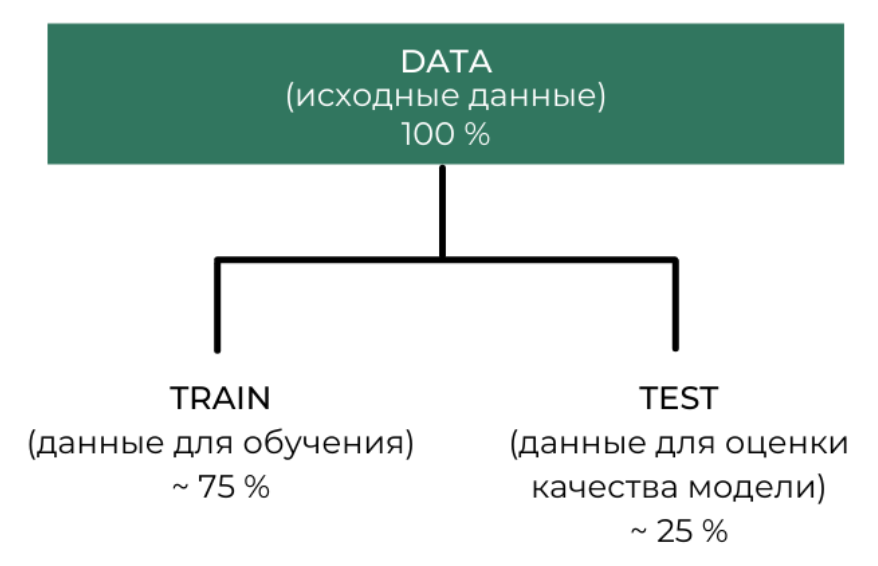

Далее каждый из полученных наборов мы делим на тренировочный (train, используется для обучения модели) и тестовый (test, используется для оценки точности модели). Такое деление осуществляется с помощью специального метода train_test_split() библиотеки sklearn. В параметрах метода (параметр test_size) мы указываем, какую часть исходного датафрейма нужно оставить для тестирования модели. В нашем коде эта часть составляет 25 %, или 0.25.

>Не существует идеального соотношения обучающей и тестовой выборки, однако принято выделять на часть обучения больше данных, около ⅔, а оставшуюся часть используют для проверки — ⅓ выборки. Таким образом, самые популярные значения параметра test_size составляют 0.3, 0.25, 0.2.


In [7]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']  
      
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

2. СОЗДАНИЕ И ОБУЧЕНИЕ МОДЕЛИ
Сам процесс создания и тестирования модели занимает всего четыре строчки кода. В качестве алгоритма мы будем использовать популярный и довольно мощный алгоритм RandomForestRegressor. Он реализован в библиотеке sklearn.

In [8]:
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

ValueError: could not convert string to float: 'Pla a de Llevant s n Sant Mart 08019 Barcelona Spain'

3. ОЦЕНКА КАЧЕСТВА МОДЕЛИ
Для оценки качества модели — точности прогнозов, сделанных моделью, — мы будем использовать метрику (некий числовой показатель), которая называется MAPE (mean absolute percentage error), средняя абсолютная процентная ошибка. Эту метрику очень легко интерпретировать. Если у вас MAPE = 11.4 %, то это говорит о том, что ошибка составила 11.4 % от фактических значений.

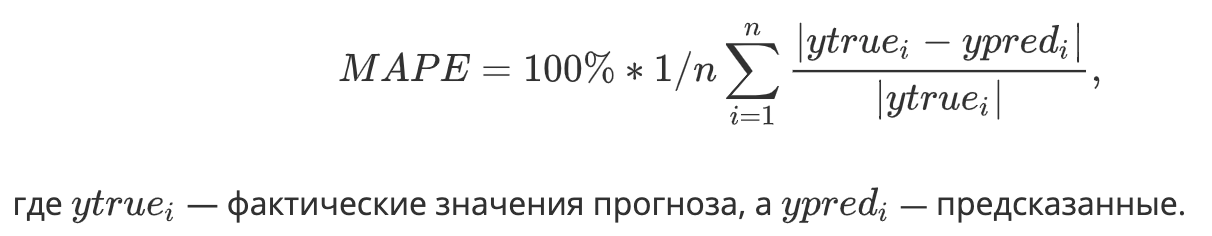

Для расчета MAPE сравним предсказанные нашей моделью значения с реальными и посмотрим на значение ошибки.

In [ ]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred))


Возникает ошибка. 

Итак, мы выяснили, что для корректной работы все данные в датафрейме, который вы будете использовать при обучении модели, должны быть в числовых форматах int или float. 

>Есть ещё одно ограничение: в столбцах не должно быть пропущенных значений. Вместо каждого пропущенного значения вам нужно будет вычислить и поместить в ячейку максимально близкое к реальности значение.

→ Таким образом, чтобы код, отвечающий за обучение модели, заработал, мы должны использовать в нём датафрейм, содержащий только количественные признаки и не содержащий пропущенных значений.

На первом этапе для создания такого датафрейма давайте просто удалим столбцы, содержащие данные типов object и string и заполним пропущенные значения каким-то одним значением (unknown, нулём или средним арифметическим) для всего столбца.

In [ ]:
hotels = hotels[['additional_number_of_scoring', 'average_score', 
        'review_total_negative_word_counts', 'total_number_of_reviews', 
        'review_total_positive_word_counts', 'total_number_of_reviews_reviewer_has_given',
        'reviewer_score', 'lat', 'lng']]

In [9]:
hotels['lat'].fillna(51.50191, inplace=True)
hotels['lng'].fillna(-0.023221, inplace=True)

In [ ]:
hotels.isnull().sum()

In [ ]:
# Разбиваем датафрейм на части, необходимые для обучения и тестирования модели  
# Х — данные с информацией об отелях, у — целевая переменная (рейтинги отелей)  
X = hotels.drop(['reviewer_score'], axis = 1)  
y = hotels['reviewer_score']  
      
# Загружаем специальный инструмент для разбивки:  
from sklearn.model_selection import train_test_split  
      
# Наборы данных с меткой "train" будут использоваться для обучения модели, "test" — для тестирования.  
# Для тестирования мы будем использовать 25 % от исходного датасета.  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Импортируем необходимые библиотеки:  
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели  
from sklearn import metrics # инструменты для оценки точности модели  
      
# Создаём модель  
regr = RandomForestRegressor(n_estimators=100)  
      
# Обучаем модель на тестовом наборе данных  
regr.fit(X_train, y_train)  
      
# Используем обученную модель для предсказания рейтинга отелей в тестовой выборке.  
# Предсказанные значения записываем в переменную y_pred  
y_pred = regr.predict(X_test)

# Сравниваем предсказанные значения (y_pred) с реальными (y_test) и смотрим, насколько они отличаются  
# Метрика называется Mean Absolute Percentage Error (MAPE) и показывает среднюю абсолютную процентную ошибку предсказанных значений в отношении фактических.  
print('MAPE:', metrics.mean_absolute_percentage_error(y_test, y_pred));

# Лучший способ добиться успеха — следовать советам

Повысить точность прогнозов, которые делает модель, с помощью более тщательной подготовки данных.

При подготовке датасета необходимо будет вспомнить все шаги, которые мы проделывали в модулях EDA. Нам нужно будет не только избавиться от пропущенных значений и нечисловых признаков, но и спроектировать новые признаки на основе информации, уже содержащейся в данных, или используя внешние источники данных, если это возможно. Также мы закодируем и преобразуем признаки, а после отберём лучшие из них.

Задачу, которая стоит перед вами, можно свести к пяти пунктам:
- Удаление строковых значений. Вам необходимо удалить из набора данных столбцы, данные в которых представлены не числами.
- Очистка от пропущенных значений. На предыдущем шаге мы делали это самым грубым из всех возможных способов, сейчас попробуйте подойти к процессу более гибко.
- Создание новых признаков. Мы попробуем создать новые столбцы с данными из существующих данных или с использованием внешних источников.
- Преобразование признаков. Применим различные преобразования над признаками вроде нормализации, стандартизации.
- Отбор признаков. Используем анализ мультиколлинеарности как шаг отбора признаков для модели.

__Ваша задача__ — при помощи этих шагов и рекомендаций повысить качество предсказания. Чтобы понять, что качество улучшилось, ориентируйтесь на метрику MAPE: чем она меньше, тем лучше. Рассмотрим шаги подробнее.

1. СТРОКОВЫЕ ДАННЫЕ
В исходном наборе данных всего девять столбцов содержат числовые данные. Так что просто удалить все object-значения и считать задачу выполненной не получится. Мы сделали это в прошлом юните, чтобы получить значение метрики. Но чтобы улучшить качество модели, вам перед удалением придётся очень основательно поработать со строковыми данными и извлечь из них как можно больше информации, которую можно представить в числовом виде.

2. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ
Мы уже говорили о том, что в задачах по машинному обучению принято не удалять строки с пустыми значениями, а заполнять их максимально близкими к реальности данными. Используйте знания из модулей очистки данных или вспомните о мере центральной тенденции в юнитах статистики. Попробуйте различные способы и ориентируйтесь на итоговую метрику.

3. НОВЫЕ ПРИЗНАКИ
Это, пожалуй, самая творческая часть работы на данном шаге. Создание новых признаков потребует от вас способности вникать в контент, умения подключать к работе интуицию, творческого подхода и готовности к экспериментам. Попробуйте извлечь несколько признаков из даты, проанализируйте датасет на возможность добавления внешних источников данных. При наличии времени разберите текстовые столбцы на признаки.

4. ПРЕОБРАЗОВАНИЕ ПРИЗНАКОВ
Данные могут быть представлены в невыгодном для модели свете. Используйте изученные вами способы преобразования данных, чтобы сделать данные качественнее.

5. ОТБОР ПРИЗНАКОВ
Признаки могут дублировать информацию. Анализ мультиколлинеарности мы будем использовать, чтобы выбрать уникальные признаки для модели.

Также перед обучением (после разделения выборки на X и y) мы можем оценить значимость каждого признака для целевой переменной — рейтинг отеля. При помощи теста мы сможем узнать, как географическая долгота отеля и количество негативных отзывов влияют на его рейтинг.

***
Для оценки значимости категориальных признаков будем использовать тест хи-квадрат, для непрерывных признаков — тест ANOVA.
***

In [ ]:
# Для начала разделим признаки по типу, перечислим их:
# непрерывные признаки
num_cols = ['additional_number_of_scoring', 'review_total_negative_word_counts',
            'total_number_of_reviews', 'review_total_positive_word_counts',
            'total_number_of_reviews_reviewer_has_given']

# категориальные признаки
cat_cols = ['average_score', 'lat', 'additional_number_of_scoring', 'review_total_negative_word_counts',
            'total_number_of_reviews', 'review_total_positive_word_counts',
            'total_number_of_reviews_reviewer_has_given']

Для оценки значимости категориальных переменных будем использовать изученный нами непараметрический тест хи-квадрат, реализованный в библиотеке sklearn.feature_selection.chi2. Метод возвращает массив значений хи-квадрат и p-value для каждого признака. Используем только значения хи-квадрат и выведем их на графике:

In [ ]:
hotels[['average_score']]

In [ ]:
y=y.astype('int')

from sklearn.feature_selection import chi2 # хи-квадрат

imp_cat = pd.Series(chi2(X[cat_cols], y)[0], index=cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh');

По графику важности категориальных признаков мы можем понять, что признак average_score важнее, чем lat, в определении рейтинга отеля.
***
Для оценки значимости непрерывных переменных будем использовать функцию f_classif из библиотеки sklearn. В основе метода оценки значимости переменных лежит изученный вами в юнитах по статистике анализ (ANOVA). Основу процедуры составляет обобщение результатов двух выборочных t-тестов для независимых выборок (2-sample t).  

Метод возвращает двумерный массив f-статистик и p-value для каждого признака. В качестве меры значимости мы будем использовать значение f-статистики. Чем значение статистики выше, тем меньше вероятность того, что средние значения не отличаются, и тем важнее данный признак для нашей модели.



In [ ]:
from sklearn.feature_selection import f_classif # anova

imp_num = pd.Series(f_classif(X[num_cols], y)[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh');

По  графику важности категориальных переменных мы можем понять, что признак review_total_negative_word_counts важнее, чем total_number_of_reviews, в определении рейтинга отеля.   
***
Результаты данных тестов вы сможете использовать в своих исследования при отборе признаков: удаляйте менее значимые признаки и сравнивайте результаты качества полученных моделей.

>→ Тесты chi2 и f_classif можно использовать для выбора n заданных признаков с наивысшими значениями статистик с помощью метода SelectKBest. Подробнее об этом вы можете прочесть в руководстве Feature selection.

In [ ]:
# Сколько уникальных названий отелей представлено в наборе данных?
hotels = pd.read_csv('data/hotels.csv')
hotels['hotel_name'].nunique()

In [4]:
# Ответьте на вопросы о дате размещения отзывов.
# Когда был оставлен самый свежий отзыв? Введите ответ в формате yyyy-mm-dd.
# Когда был оставлен самый первый отзыв? Введите ответ в формате yyyy-mm-dd.
hotels['date_time'] = pd.to_datetime(hotels['review_date'], format='%m/%d/%Y')
hotels['date_time'].max()
hotels['date_time'].min()

Timestamp('2017-08-03 00:00:00')

Timestamp('2015-08-04 00:00:00')

In [27]:
#Сколько уникальных тегов представлено в наборе данных?
# Избавимся от скобок и кавычек в начале и конце строки
tg = hotels['tags'].apply(lambda x: x[2:-2])
# Избавимся от пробелов в начале и конце строки затем удалим кавычки пробелы и запятые
tg = tg.apply(lambda x: x.strip().split(' \', \' '))
# Разбиваем списки получившиеся на строки 
tg = tg.explode()
tg.nunique()

2368

In [28]:
# or
def rev_func(num_tags):
    num_tags = num_tags[2:-2]
    res = num_tags.strip().split(' \', \' ')
    return res

hotels['tags_n'] = hotels['tags'].apply(rev_func)
tg = hotels['tags_n'].explode()
tg.nunique()

2368

In [58]:
# Какой тег представлен в наибольшем числе отзывов?
# 
hotels_cop = hotels.copy()
# разбиваем список на строки (добавляет строки в датасет)
hotels_cop = hotels_cop.explode('tags_n')
# групируем по дате и смотрим первое слово в датах
hotels_cop.groupby('date_time')['tags_n'].first()
# или так можно hotels_cop['tags_n'].value_counts()

date_time
2015-08-04     Leisure trip
2015-08-05     Leisure trip
2015-08-06     Leisure trip
2015-08-07     Leisure trip
2015-08-08     Leisure trip
                  ...      
2017-07-30     Leisure trip
2017-07-31     Leisure trip
2017-08-01     Leisure trip
2017-08-02     Leisure trip
2017-08-03    Business trip
Name: tags_n, Length: 731, dtype: object

In [59]:
# Из тегов выясните, на сколько ночей чаще всего останавливаются путешественники в отелях.
hotels_cop['tags_n']

Leisure trip                         313593
Submitted from a mobile device       230778
Couple                               189212
Stayed 1 night                       145373
Stayed 2 nights                      100263
                                      ...  
Studio with Spa Access                    1
Comfort Family Room                       1
Junior Suite Free Wifi                    1
Design Suite                              1
Executive Double Room Non Smoking         1
Name: tags_n, Length: 2368, dtype: int64

In [ ]:
# Какое значение метрики MAPE вам удалось получить на этом этапе?
# 0.13797913849213217

# Побеждаем в соревновании

При выполнении этого проекта у каждого должен получиться свой уникальный набор данных, содержащий уникальный набор признаков. Иными словами, мы не стремимся привести всех к единому результату и одинаковому «единственно правильному» набору признаков.

У вас в руках есть немало полезных инструментов и ценных знаний. Настало время экспериментов. Попробуйте «поиграть» с имеющимися в вашем распоряжении данными:

- добавляйте и удаляйте столбцы с признаками;
- попробуйте использовать разные способы представления информации об одном и том же признаке;
- используйте дополнительные источники информации о расположении отелей, чтобы лучше охарактеризовать среду, в которой находится отель;
    - что находиться рядом с отелем в пределах 1 км ?
    - страна и температура, наличие моря, гор, экскурсий
- используйте различные преобразования признаков;
- разберите дату на несколько новых признаков;
- используйте отбор мультиколлинеарных признаков;
- пробуйте извлекать полезные данные из строковых признаков: в текстах отзывов, адресах или тегах отеля может скрываться важная информация;
- используйте кодирование признаков как оцифровку некоторых строковых значений.

__Помните, ваша главная задача — добиться максимальной точности модели, которая предсказывает рейтинг отеля.__

После завершения экспериментов предоставьте свой код для проверки и обратной связи.

Используйте предложенные рекомендации для улучшения модели. Обучите модель, сделайте сабмит результата. Подумайте, как ещё можно изменить или дополнить признаки, чтобы улучшить модель, сохраните и сделайте сабмит нового решения. Если позволяет время, вы можете создать сколько угодно вариантов решения и выбрать лучшие из них, которые пойдут в лидерборд, но мы рекомендуем сделать минимум три варианта.

***

КРИТЕРИИ ОЦЕНИВАНИЯ:

- Качество кода (соблюдение стандартов оформления PEP-8, комментирование кода, README к проекту). Оформление проекта на GitHub, GitLab, Kaggle.
- Очистка данных.
- Исследование данных (качество визуализации, наличие идей, гипотез, комментариев).
- Генерация признаков.
- Отбор признаков.
- Преобразование признаков.
- Качество решения: результат метрики MAPE.


In [ ]:
hotel_address — адрес отеля; k
review_date — дата, когда рецензент разместил соответствующий отзыв; n
average_score — средний балл отеля, рассчитанный на основе последнего комментария за последний год; k
hotel_name — название отеля; k
reviewer_nationality — страна рецензента; k
negative_review — отрицательный отзыв, который рецензент дал отелю; k
review_total_negative_word_counts — общее количество слов в отрицательном отзыв; n
positive_review — положительный отзыв, который рецензент дал отелю; k
review_total_positive_word_counts — общее количество слов в положительном отзыве. n
reviewer_score — оценка, которую рецензент поставил отелю на основе своего опыта; k
total_number_of_reviews_reviewer_has_given — количество отзывов, которые рецензенты дали в прошлом; n
total_number_of_reviews — общее количество действительных отзывов об отеле; n
tags — теги, которые рецензент дал отелю; k
days_since_review — количество дней между датой проверки и датой очистки; n
additional_number_of_scoring — есть также некоторые гости, которые просто поставили 
оценку сервису, но не оставили отзыв. Это число указывает, сколько там действительных оценок без проверки. n
lat — географическая широта отеля; k
lng — географическая долгота отеля. k